In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Preprocess the dataset: Convert categorical values like M, F in Sex, ATA, NAP, ASY in ChestPainType to Numberical values using OneHotEncoding
from sklearn.preprocessing import LabelEncoder
sex_encoder = LabelEncoder()
chest_pain_type_encoder = LabelEncoder()
restingECG_encoder = LabelEncoder()
exerciseAngina_encoder = LabelEncoder()
ST_Slope = LabelEncoder()

data["Sex"] = sex_encoder.fit_transform(data["Sex"])
data["ChestPainType"]=chest_pain_type_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"]= sex_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"]=sex_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] =sex_encoder.fit_transform(data["ST_Slope"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
#Assign input values
#In unsupervised learning, y is not considered.
#Consider entire dataset into X
X = data.iloc[:, :]
#Instantiate the DBSCAN model
dbscan = DBSCAN(eps=15, min_samples=10)
# Fit the model and predict cluster labels

cluster_labels = dbscan.fit_predict(X)
cluster_labels


array([-1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0, -1,
       -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,
       -1,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,
       -1, -1,  0, -1,  0,  0, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1,
       -1,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0, -1,  0,  2,  0,
        0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,  0, -1,  0,
        0, -1, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,
       -1, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,
       -1, -1, -1,  0,  0

In [ ]:
#Find the number of clusters
#In DBSCAN, cluster_labels with values less than are outliers
import numpy as np
np.unique(cluster_labels)



array([-1,  0,  1,  2])

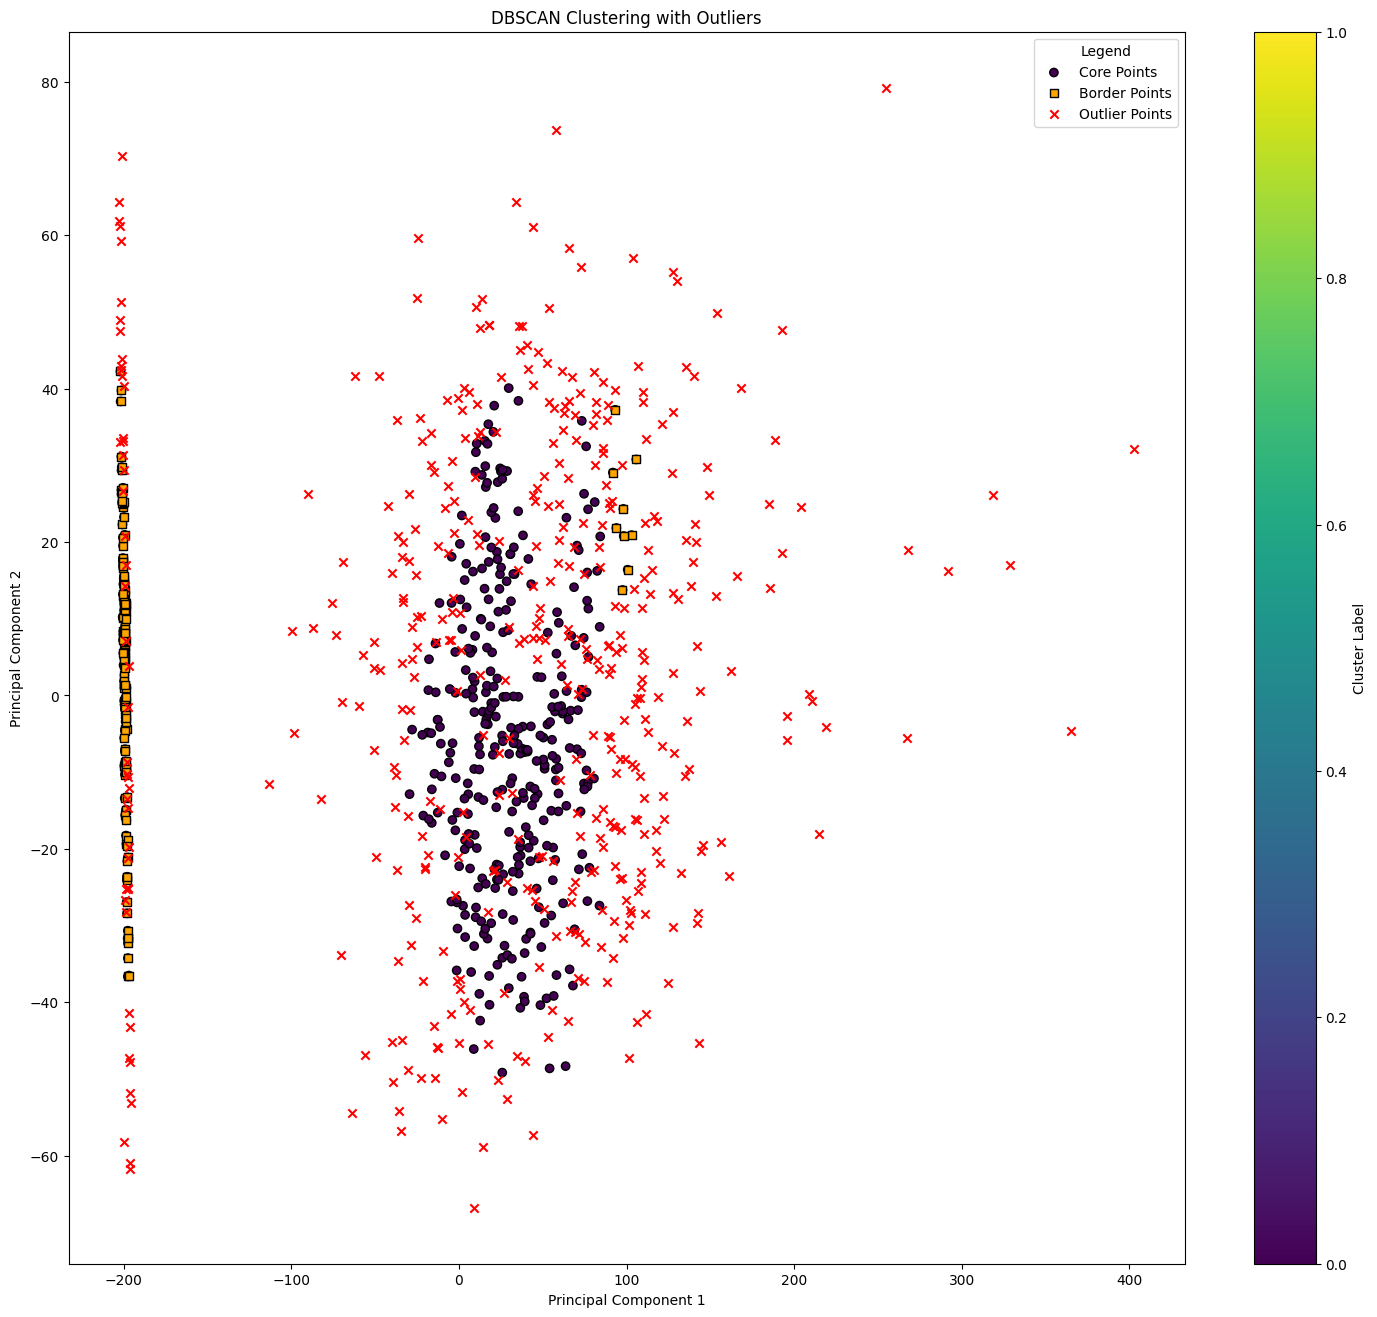

In [ ]:
# Inorder to plot the clusters and visualize outlier, convert the 12 columns into 2 principal columns using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters and outliers
plt.figure(figsize=(18, 16))

# Scatter plot for the first two columns of X
# Plotting core points with cluster labels >= in one color and marker
plt.scatter(X_pca[cluster_labels >= 0, 0], X_pca[cluster_labels >= 0, 1],
            c=cluster_labels[cluster_labels >= 0], cmap='viridis',
            marker='o', edgecolors='k', label='Core Points')

# Plotting border points with cluster labels in a different color and marker
plt.scatter(X_pca[(cluster_labels > 0) & (cluster_labels != -1), 0],
            X_pca[(cluster_labels > 0) & (cluster_labels != -1), 1],
            c='orange', marker='s', edgecolors='k', label='Border Points')

# Plotting points with cluster label -1 (outliers) in red
plt.scatter(X_pca[cluster_labels == -1, 0], X_pca[cluster_labels == -1, 1],
            c='red', marker='x', label='Outlier Points')

plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
# Adding legend with custom labels
plt.legend(title='Legend')
plt.show()


In [ ]:
#Remove outlier data from the dataset
import numpy as np

# Find the indices of outliers (cluster label -1)
outlier_indices = np.where(cluster_labels == -1)[0]

print("Indices of outliers:", outlier_indices)

# Drop rows corresponding to outlier indices
data_without_outliers = data.drop(outlier_indices)


# Optionally, you can reset the index after dropping rows
data_without_outliers.reset_index(drop=True, inplace=True)

# Display the modified dataset
print(data_without_outliers)

Indices of outliers: [  0   1   2   5   9  11  18  19  20  23  26  27  28  30  31  33  34  36
  41  42  44  45  48  49  51  55  56  58  59  60  61  65  66  67  68  69
  75  76  77  78  80  83  85  86  88  91  93  94  97  98 101 102 103 104
 106 107 108 109 111 113 115 116 117 118 119 123 125 126 127 130 132 138
 139 140 141 142 145 148 149 151 154 155 158 159 161 162 165 169 170 171
 172 173 175 177 179 182 184 185 186 188 189 190 191 193 194 195 196 198
 199 202 203 204 206 208 210 211 214 215 216 219 221 222 223 227 228 229
 230 232 234 236 237 238 239 240 241 242 243 244 249 250 251 252 254 256
 257 259 263 265 266 267 268 271 274 275 276 277 278 283 284 285 286 288
 289 296 300 309 310 312 314 318 320 322 328 332 333 334 336 337 339 351
 360 362 365 369 370 372 375 378 380 386 388 389 390 393 394 395 397 399
 402 407 410 411 415 416 420 423 425 426 431 432 433 440 444 447 449 457
 461 468 472 473 475 478 486 490 491 493 496 498 501 505 507 509 511 512
 516 519 521 522 523 524 526 5